In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import time

In [12]:
df1 = pd.read_csv('./spacy/ent_dataframes/july_seth_rich_ents')
df2 = pd.read_csv('./spacy/ent_dataframes/aug_seth_rich_ents')
df3 = pd.read_csv('./spacy/ent_dataframes/sept_seth_rich_ents')
df = pd.concat([df1,df2,df3])

In [14]:
df.head(50)

,Unnamed: 0,date,ent,count
0,0,2016-07-26,seth rich,13
1,1,2016-07-27,seth rich,41
2,2,2016-07-28,seth rich,27
3,3,2016-07-30,seth rich,10
0,0,2016-08-06,seth rich,11
1,1,2016-08-09,seth rich,14
2,2,2016-08-10,seth rich,308
3,3,2016-08-11,seth rich,96
4,4,2016-08-12,seth rich,684
5,5,2016-08-13,seth rich,208


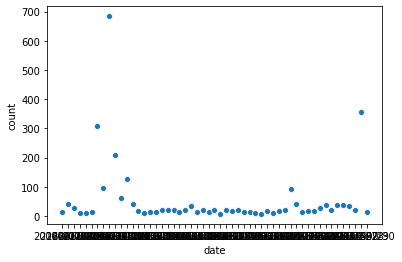

In [18]:
sns.scatterplot(x='date', y='count', data=df, x_bins=1)
ax.set(xlabel="time", ylabel="measured values")


[Text(0, 0.5, 'Reddit Mentions'), Text(0.5, 0, 'Date')]

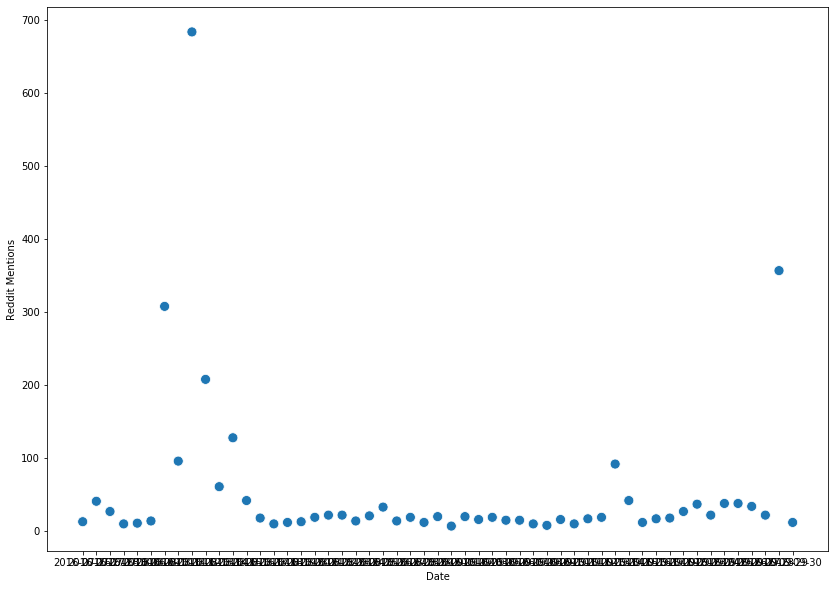

In [56]:
plt.figure(figsize=(14,10))

ax = sns.scatterplot(df.index, 'count', data=df, size = 'count', sizes=(100,100), legend=False)
ax.set(xlabel="Date", ylabel="Reddit Mentions")



In [4]:
class Ents:
    def __init__(self):
        self.df = None

    def SethRich(self):
        # Seth Rich was murdered on July 10, 2016
        df_SR = pd.DataFrame()
        month = 9
        in_file = '../data/ent_counts/ents_' + str(month) + '.csv'
        self.df = pd.read_csv(in_file)
        ent_list = []
        count_list = []
        dates = []
        for i in range(1, 32):
            if i < 10:
                curr_date = '2016-09-0' + str(i)
            else:
                curr_date = '2016-09-' + str(i)
            print(f'Currently processing date: {curr_date}')
            curr_ent_column = str(curr_date) + "_ents"
            curr_count_column = str(curr_date) + "_count"
            try:
                for ent, count in zip(self.df[curr_ent_column], self.df[curr_count_column]):
                    if ent == "seth rich":
                        ent_list.append(ent)
                        count_list.append(count)
                        dates.append(curr_date)


            except:
                print(f'Passing {curr_date}')
        df_SR['date'] = dates
        df_SR['ent'] = ent_list
        df_SR['count'] = count_list
        print(df_SR.head())
        df_SR.to_csv('./ent_dataframes/sept_seth_rich_ents')

,Unnamed: 0,2016-07-01_ents,2016-07-01_count,2016-07-02_ents,2016-07-02_count,2016-07-03_ents,2016-07-03_count,2016-07-04_ents,2016-07-04_count,2016-07-05_ents,...,2016-07-27_ents,2016-07-27_count,2016-07-28_ents,2016-07-28_count,2016-07-29_ents,2016-07-29_count,2016-07-30_ents,2016-07-30_count,2016-07-31_ents,2016-07-31_count
0,0,blm,43,blm,48,blm,51,blm,69,the emails,...,the emails,169,soros,105,blm,73,soros,78,globalist,65
1,1,globalist,37,globalist,26,soros,37,globalist,33,benghazi,...,blm,132,blm,97,clinton cash,72,globalist,64,benghazi,58
2,2,civil war,19,the emails,19,civil war,22,clinton emails,19,civil war,...,clinton cash,113,globalist,59,soros,61,blm,62,soros,55
3,3,globalists,19,benghazi,13,pizza,21,the emails,18,email server,...,globalist,72,the emails,46,globalist,53,globalists,40,blm,51
4,4,rapists,17,soros,12,globalist,20,globalists,14,blm,...,black lives matter,54,clinton cash,45,benghazi,45,benghazi,28,globalists,44
5,5,black lives matter,16,globalists,9,globalists,18,email server,14,classified emails,...,dnc emails,52,dnc emails,35,the emails,36,the emails,23,dnc emails,41
6,6,benghazi,11,rapists,8,the emails,17,black lives matter,12,globalist,...,globalists,52,globalists,29,george soros,35,clinton cash,22,the emails,24
7,7,george soros,10,black lives matter,8,black lives matter,16,these emails,11,her emails,...,soros,46,george soros,28,pedophile,24,pedophile,18,rapists,17
8,8,soros,9,genderfluid,7,rapists,14,pedophile,10,guccifer,...,those emails,41,seth rich,27,black lives matter,24,george soros,18,pedophile,14
9,9,pedophile,8,email server,7,illuminati,13,soros,9,secret emails,...,seth rich,41,black lives matter,21,pizza,21,satan,15,civil war,13
